# Kredi Değerlendirme Veri Bilimi Projesi

İlk aşamada gerekli olan kütüphaneleri indirelim ve verimizi içe aktaralım.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

import warnings
warnings.filterwarnings('ignore')

In [2]:
loans = pd.read_csv('C:/Users/emird/OneDrive/Masaüstü/Proje/lc_2016_2017.csv')

Verimize ilk bakışı atalım.

In [3]:
loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,112435993,NaN,2300,2300,2300.0,36 months,12.62,77.08,C,C1,...,0.0,NaN,1.0,2.0,2315.0,55.0,7100.0,1.0,0.0,2.0
1,112290210,NaN,16000,16000,16000.0,60 months,12.62,360.95,C,C1,...,11078.0,69.0,3.0,5.0,1962.0,94.0,31900.0,0.0,6.0,1.0
2,112436985,NaN,6025,6025,6025.0,36 months,15.05,209.01,C,C4,...,0.0,NaN,1.0,2.0,1950.0,45.0,27700.0,1.0,5.0,3.0
3,112439006,NaN,20400,20400,20400.0,36 months,9.44,652.91,B,B1,...,53566.0,95.0,1.0,2.0,4240.0,60.0,46900.0,1.0,1.0,1.0
4,112438929,NaN,13000,13000,13000.0,36 months,11.99,431.73,B,B5,...,8466.0,72.0,0.0,1.0,2996.0,78.0,7800.0,0.0,0.0,0.0


Verimizin kaç satır ve kaç sütundan oluştuğuna bakalım.

In [4]:
loans.shape

(759338, 72)

Verimizin sütun isimlerine de bakalım.

In [5]:
loans.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'desc', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'acc_now_de

# Veri Temizliği

İlk olarak net bir şekilde ihtiyaç duyulmayan sütunları verimizden kaldıralım.

In [6]:
removed_columns = ['id', 'member_id', 'funded_amnt', 'funded_amnt_inv',
                   'grade', 'sub_grade', 'emp_title', 'issue_d', 
                   'zip_code', 'addr_state', 'earliest_cr_line', 
                   'out_prncp','out_prncp_inv', 'total_pymnt', 
                   'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
                   'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
                   'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
                   'last_credit_pull_d', 'dti_joint',
                   'tot_cur_bal', 'open_acc_6m', 'open_il_12m', 'open_il_24m',
                   'mths_since_rcnt_il', 'open_rv_12m', 'open_rv_24m',
                   'tot_coll_amt', 'total_bal_il', 'mths_since_last_delinq',
                   'mths_since_last_record', 'mths_since_last_major_derog']

new_loans = loans.drop(removed_columns, axis=1)

In [7]:
new_loans.shape

(759338, 35)

In [8]:
new_loans.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'pymnt_plan', 'desc', 'purpose', 'title', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'annual_inc_joint',
       'verification_status_joint', 'acc_now_delinq', 'il_util', 'max_bal_bc',
       'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl',
       'inq_last_12m'],
      dtype='object')

In [9]:
new_loans.head()

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,...,annual_inc_joint,verification_status_joint,acc_now_delinq,il_util,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,2300,36 months,12.62,77.08,NaN,OWN,10000.0,Not Verified,Current,n,...,NaN,NaN,0,NaN,2315.0,55.0,7100.0,1.0,0.0,2.0
1,16000,60 months,12.62,360.95,10+ years,MORTGAGE,94000.0,Not Verified,Current,n,...,NaN,NaN,0,69.0,1962.0,94.0,31900.0,0.0,6.0,1.0
2,6025,36 months,15.05,209.01,7 years,MORTGAGE,46350.0,Not Verified,Current,n,...,NaN,NaN,0,NaN,1950.0,45.0,27700.0,1.0,5.0,3.0
3,20400,36 months,9.44,652.91,10+ years,RENT,44000.0,Source Verified,Current,n,...,NaN,NaN,0,95.0,4240.0,60.0,46900.0,1.0,1.0,1.0
4,13000,36 months,11.99,431.73,10+ years,MORTGAGE,85000.0,Source Verified,Current,n,...,NaN,NaN,0,72.0,2996.0,78.0,7800.0,0.0,0.0,0.0


In [10]:
print(new_loans.inq_last_12m.value_counts())

0.0     205507
1.0     184075
2.0     131382
3.0      86906
4.0      55121
5.0      34256
6.0      21428
7.0      13682
8.0       8869
9.0       5796
10.0      3668
11.0      2579
12.0      1699
13.0      1198
14.0       867
15.0       597
16.0       457
17.0       300
18.0       206
19.0       180
20.0       110
21.0       105
22.0        65
23.0        51
24.0        37
26.0        28
27.0        27
25.0        25
29.0        11
28.0        10
30.0         8
33.0         5
32.0         5
31.0         4
34.0         4
40.0         3
38.0         1
35.0         1
41.0         1
49.0         1
36.0         1
Name: inq_last_12m, dtype: int64


Yapay zeka algoritmasının tahmin etmesini isteyeceğimiz değer olan 'loan_status''e bir bakış atalım.

In [11]:
print(new_loans.loan_status.value_counts())

Current               565523
Fully Paid            130718
Charged Off            37197
Late (31-120 days)     15354
In Grace Period         6634
Late (16-30 days)       3876
Default                   36
Name: loan_status, dtype: int64


Burada bizim için önemli olan bilgiler kredi durumunun ödenmiş mi yoksa ödenmemiş mi olduğu bilgisidir.

In [12]:
new_loans = new_loans[(new_loans['loan_status'] == 'Fully Paid')|
                      (new_loans['loan_status'] == 'Charged Off')]

In [13]:
loan_status_dict = {
    'loan_status' : {
        'Fully Paid' : 1,
        'Charged Off' : 0
    }
}

new_loans = new_loans.replace(loan_status_dict)

Verisetimizdeki objectlerden kurtulabilmek için dummy değişkenler atamamız gereklidir.

In [14]:
new_loans.head()

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,...,annual_inc_joint,verification_status_joint,acc_now_delinq,il_util,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
8,11575,36 months,7.35,359.26,6 years,OWN,153000.0,Not Verified,1,n,...,NaN,NaN,0,63.0,1581.0,36.0,37600.0,1.0,6.0,2.0
10,7200,36 months,24.85,285.70,2 years,RENT,50000.0,Source Verified,1,n,...,NaN,NaN,0,51.0,2779.0,74.0,3600.0,0.0,0.0,0.0
24,7500,36 months,7.35,232.79,7 years,MORTGAGE,110000.0,Not Verified,1,n,...,NaN,NaN,0,70.0,5965.0,39.0,85700.0,6.0,8.0,6.0
42,10000,60 months,16.02,243.29,7 years,RENT,51979.0,Source Verified,1,n,...,NaN,NaN,0,95.0,3898.0,32.0,28700.0,0.0,0.0,0.0
91,14000,36 months,16.02,492.34,7 years,MORTGAGE,75000.0,Verified,1,n,...,NaN,NaN,0,82.0,2700.0,83.0,3000.0,3.0,0.0,4.0


Bütün değerleri aynı olan özellikler yapay zekamızı eğitemeyecektir. Dolayısıyla bunlardan kurtulmamız gerekmektedir.

In [15]:
drop_columns = []
for col in new_loans.columns:
    is_unique = len(new_loans[col].dropna().unique())
    if is_unique == 1:
        drop_columns.append(col)

In [16]:
drop_columns

['pymnt_plan', 'policy_code']

In [17]:
new_loans = new_loans.drop(drop_columns, axis=1)

Artık devam etmeyi düşündüğümüz değişkenlerin bilgilerini kontrol ederek son aşama olan Yapay Zeka algoritması için verimizi hazırlayacağız. Eksik değerleri de bu aşamadan önce kontrol etmemiz gerekmektedir. Ayrıca değerlerin hepsinin numerik olduğundan emin olmamız gerekmektedir.

In [18]:
null_counts = new_loans.isnull().sum()
null_counts[null_counts > 0]

emp_length                    10749
desc                         167908
title                          7838
dti                              34
inq_last_6mths                    1
revol_util                      117
annual_inc_joint             164353
verification_status_joint    164353
il_util                       21218
max_bal_bc                       23
all_util                         35
inq_fi                           23
total_cu_tl                      24
inq_last_12m                     24
dtype: int64

In [19]:
print(new_loans.annual_inc_joint.value_counts(normalize=True, dropna=False))

NaN         0.978787
120000.0    0.000423
90000.0     0.000375
100000.0    0.000351
80000.0     0.000339
              ...   
119620.0    0.000006
82346.0     0.000006
97136.0     0.000006
88080.0     0.000006
320000.0    0.000006
Name: annual_inc_joint, Length: 1104, dtype: float64


In [20]:
print(new_loans.annual_inc_joint.value_counts(normalize=True, dropna=False))

NaN         0.978787
120000.0    0.000423
90000.0     0.000375
100000.0    0.000351
80000.0     0.000339
              ...   
119620.0    0.000006
82346.0     0.000006
97136.0     0.000006
88080.0     0.000006
320000.0    0.000006
Name: annual_inc_joint, Length: 1104, dtype: float64


In [21]:
print(new_loans.verification_status_joint.value_counts(normalize=True, dropna=False))

NaN                0.978787
Not Verified       0.017854
Source Verified    0.001870
Verified           0.001489
Name: verification_status_joint, dtype: float64


In [22]:
print(new_loans.il_util.value_counts(normalize=True, dropna=False))

NaN      0.126362
86.0     0.019278
81.0     0.019087
85.0     0.019087
83.0     0.018718
           ...   
184.0    0.000006
180.0    0.000006
205.0    0.000006
233.0    0.000006
291.0    0.000006
Name: il_util, Length: 198, dtype: float64


Görüldüğü üzere bazı sütünlarda NaN değeri oldukça fazladır. NaN sayısı oldukça fazla olan bu değişkenleri verimizden kaldırmamız gerekmektedir. Ayrıca emp_length, purpose gibi değişkenleri veriden silemeyiz. Bu değişkenler bizim için önem arzetmektedir. Bu değişkenleri yeniden yapılandırmamız gerekmektedir.

In [23]:
remove_col = ['annual_inc_joint','verification_status_joint', 'il_util', 'desc']

In [24]:
new_loans = new_loans.drop(remove_col, axis=1)

In [25]:
new_loans = new_loans.dropna(axis=0)

In [26]:
new_loans.head()

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,...,initial_list_status,collections_12_mths_ex_med,application_type,acc_now_delinq,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
8,11575,36 months,7.35,359.26,6 years,OWN,153000.0,Not Verified,1,credit_card,...,w,0,Individual,0,1581.0,36.0,37600.0,1.0,6.0,2.0
10,7200,36 months,24.85,285.70,2 years,RENT,50000.0,Source Verified,1,debt_consolidation,...,w,0,Individual,0,2779.0,74.0,3600.0,0.0,0.0,0.0
24,7500,36 months,7.35,232.79,7 years,MORTGAGE,110000.0,Not Verified,1,debt_consolidation,...,w,0,Individual,0,5965.0,39.0,85700.0,6.0,8.0,6.0
42,10000,60 months,16.02,243.29,7 years,RENT,51979.0,Source Verified,1,debt_consolidation,...,w,0,Individual,0,3898.0,32.0,28700.0,0.0,0.0,0.0
91,14000,36 months,16.02,492.34,7 years,MORTGAGE,75000.0,Verified,1,debt_consolidation,...,w,0,Individual,0,2700.0,83.0,3000.0,3.0,0.0,4.0


In [27]:
new_loans.isnull().sum()

loan_amnt                     0
term                          0
int_rate                      0
installment                   0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
loan_status                   0
purpose                       0
title                         0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
collections_12_mths_ex_med    0
application_type              0
acc_now_delinq                0
max_bal_bc                    0
all_util                      0
total_rev_hi_lim              0
inq_fi                        0
total_cu_tl                   0
inq_last_12m                  0
dtype: int64

Görüldüğü üzere verimizde artık eksik gözlem kalmamış olsa bile hala düzenlememiz gereken kategorik değişkenler bulunmaktadır.

# Veri Tipi Dönüşümü

In [28]:
new_loans.dtypes.value_counts()

float64    13
int64       8
object      8
dtype: int64

In [29]:
obj_df = new_loans.select_dtypes(include=['object'])

In [30]:
obj_df.head()

,term,emp_length,home_ownership,verification_status,purpose,title,initial_list_status,application_type
8,36 months,6 years,OWN,Not Verified,credit_card,Credit card refinancing,w,Individual
10,36 months,2 years,RENT,Source Verified,debt_consolidation,Debt consolidation,w,Individual
24,36 months,7 years,MORTGAGE,Not Verified,debt_consolidation,Debt consolidation,w,Individual
42,60 months,7 years,RENT,Source Verified,debt_consolidation,Debt consolidation,w,Individual
91,36 months,7 years,MORTGAGE,Verified,debt_consolidation,Debt consolidation,w,Individual


In [31]:
cols = ['home_ownership', 'verification_status',
        'emp_length', 'term', 'purpose', 'title',
        'initial_list_status', 'application_type']

In [32]:
for col in cols:
    print(new_loans[col].value_counts())

MORTGAGE    76233
RENT        55868
OWN         18044
ANY            89
NONE            1
Name: home_ownership, dtype: int64
Source Verified    63208
Not Verified       44522
Verified           42505
Name: verification_status, dtype: int64
10+ years    55024
2 years      14647
3 years      12858
< 1 year     12382
1 year       10526
5 years       9851
4 years       9475
6 years       6904
8 years       6703
9 years       6479
7 years       5386
Name: emp_length, dtype: int64
36 months    114007
60 months     36228
Name: term, dtype: int64
debt_consolidation    86537
credit_card           28222
home_improvement      11746
other                 10490
major_purchase         3957
medical                2052
car                    1807
small_business         1660
moving                 1355
vacation               1291
house                  1002
renewable_energy        116
Name: purpose, dtype: int64
Debt consolidation         86516
Credit card refinancing    28225
Home improvement         

In [33]:
new_loans.emp_length.value_counts()

10+ years    55024
2 years      14647
3 years      12858
< 1 year     12382
1 year       10526
5 years       9851
4 years       9475
6 years       6904
8 years       6703
9 years       6479
7 years       5386
Name: emp_length, dtype: int64

In [34]:
emp_length_dict = {
    'emp_length' : {
        '10+ years' : 10,
        '9 years' : 9,
        '8 years' : 8,
        '7 years' : 7,
        '6 years' : 6,
        '5 years' : 5,
        '4 years' : 4,
        '3 years' : 3,
        '2 years' : 2,
        '1 year' : 1,
        '< 1 year' : 7
    }
}

new_loans = new_loans.replace(emp_length_dict)

In [35]:
rem_col = ['title', 'initial_list_status']

In [36]:
new_loans = new_loans.drop(rem_col, axis=1)

Kategorik değişkenlere dummy değişken atayıp artık modelimizi bu değişkenlerle kurmalıyız.

In [37]:
df_dummy = pd.get_dummies(new_loans[['term', 'home_ownership', 'verification_status',
                                     'purpose', 'application_type']])

In [38]:
df_dummy.head()

,term_36 months,term_60 months,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,...,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,application_type_Individual,application_type_Joint App
8,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
10,1,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
24,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
42,0,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
91,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [39]:
new_loans = pd.concat([new_loans, df_dummy], axis=1)

In [40]:
new_loans = new_loans.drop(['term', 'home_ownership', 'verification_status',
                            'purpose', 'application_type'], axis=1)

In [41]:
print(new_loans.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150235 entries, 8 to 759283
Data columns (total 46 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            150235 non-null  int64  
 1   int_rate                             150235 non-null  float64
 2   installment                          150235 non-null  float64
 3   emp_length                           150235 non-null  int64  
 4   annual_inc                           150235 non-null  float64
 5   loan_status                          150235 non-null  int64  
 6   dti                                  150235 non-null  float64
 7   delinq_2yrs                          150235 non-null  int64  
 8   inq_last_6mths                       150235 non-null  float64
 9   open_acc                             150235 non-null  int64  
 10  pub_rec                              150235 non-null  int64  
 11  revol_bal    

Burada da görüldüğü gibi verimizde 'object' tipinde değişken kalmamakla beraber tüm değişkenlerimizin uzunluğu eşittir.

# Görselleştirme

Değişkenler arasındaki ilişkileri ve dağılımlarını görmek istersek :

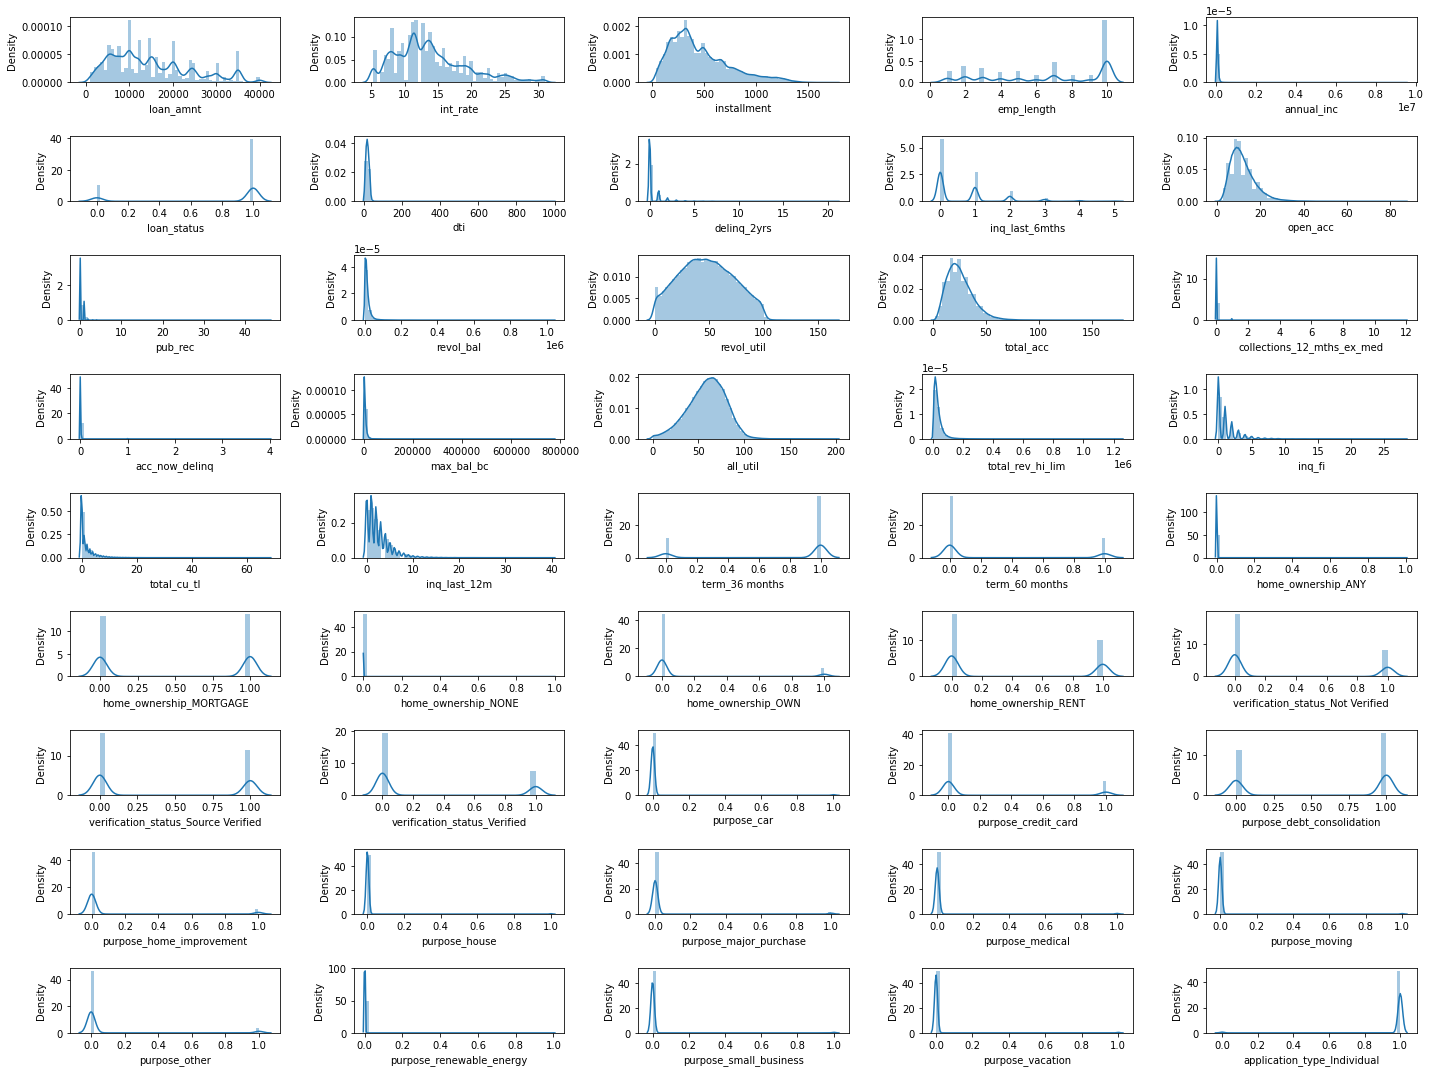

In [42]:
plt.figure(figsize = (20,15))
plotnumber = 1

for column in new_loans:
    if plotnumber <= 45:
        ax = plt.subplot(9,5,plotnumber)
        sbn.distplot(new_loans[column])
        plt.xlabel(column)
        
    plotnumber += 1
plt.tight_layout()
plt.show()

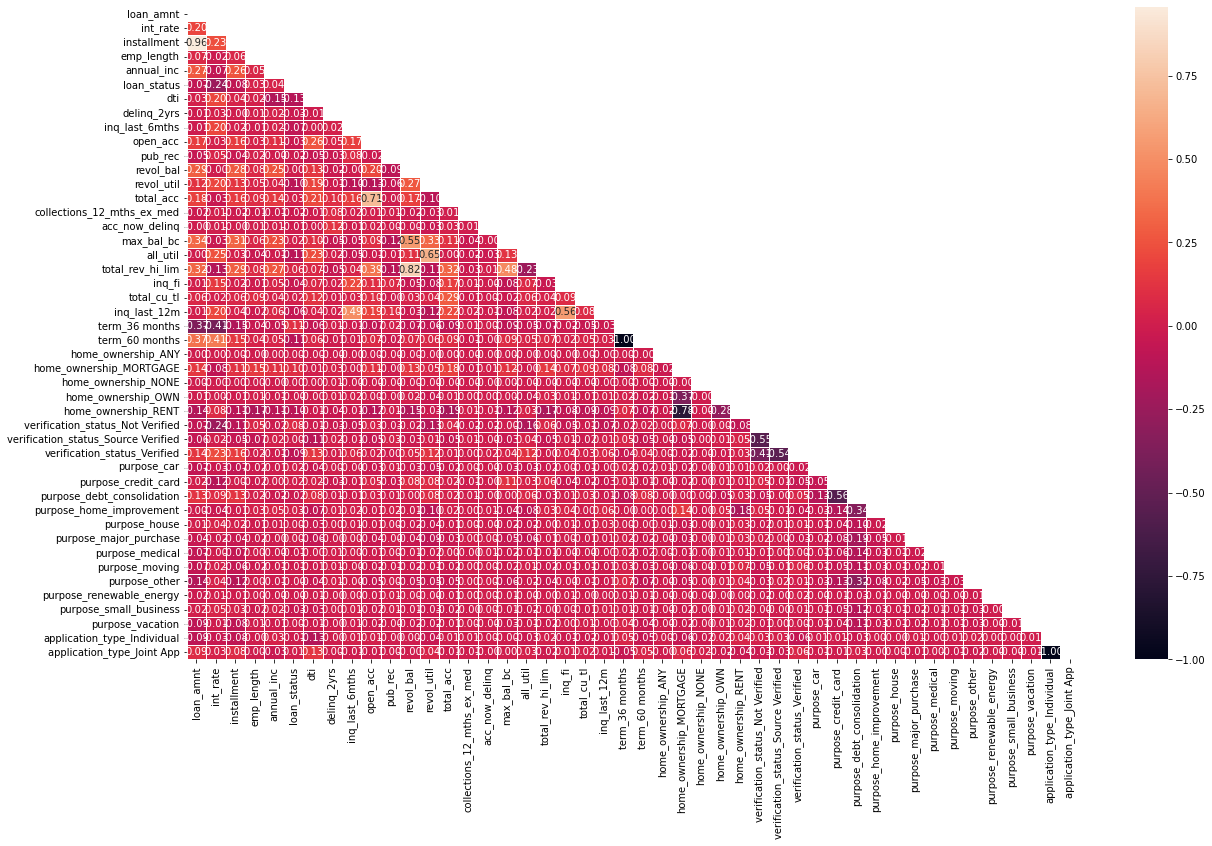

In [43]:
plt.figure(figsize = (20,12))

korelasyon = new_loans.corr()
mask = np.triu(np.ones_like(korelasyon, dtype = bool))

sbn.heatmap(korelasyon, mask = mask, linewidths = 1, annot = True, fmt = '.2f')
plt.show()

Artık bağımlı ve bağımsız değişkenlerimizi belirleyip modelleme işlemimize geçebiliriz.

In [44]:
x = new_loans.drop('loan_status', axis=1)

In [45]:
y = new_loans['loan_status']

In [46]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score , classification_report , roc_auc_score , roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV , cross_val_score
from sklearn.metrics import mean_absolute_percentage_error

Verimizi %70 eğitim ve %30 test şeklinde ayıralım.

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

In [48]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(105164, 45)
(105164,)
(45071, 45)
(45071,)


# Model Kurma

# Extreme Gradient Boosting

In [49]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(objective = 'binary:logistic',
                    learning_rate = 0.75,
                    max_depth = 75,
                    n_estimators = 750).fit(x_train, y_train)

In [50]:
y_pred_xgb_train = xgb_model.predict(x_train)
y_pred_xgb_train_proba = xgb_model.predict_proba(x_train)
print(y_pred_xgb_train_proba[:10])

[[4.4554472e-04 9.9955446e-01]
 [9.9845785e-01 1.5421765e-03]
 [9.9857223e-01 1.4277725e-03]
 [8.7004900e-04 9.9912995e-01]
 [2.1457672e-06 9.9999785e-01]
 [1.5381575e-03 9.9846184e-01]
 [4.1723251e-06 9.9999583e-01]
 [4.1073561e-04 9.9958926e-01]
 [6.2793493e-04 9.9937207e-01]
 [1.6212463e-05 9.9998379e-01]]


In [51]:
y_pred_xgb_test = xgb_model.predict(x_test)
y_pred_xgb_test_proba = xgb_model.predict_proba(x_test)
print(y_pred_xgb_test_proba[:10])

[[2.8066075e-01 7.1933925e-01]
 [7.5450361e-01 2.4549636e-01]
 [1.4421660e-01 8.5578340e-01]
 [2.9325485e-05 9.9997067e-01]
 [1.0728836e-04 9.9989271e-01]
 [1.1026859e-04 9.9988973e-01]
 [2.6994139e-01 7.3005861e-01]
 [4.8398972e-05 9.9995160e-01]
 [1.7005587e-01 8.2994413e-01]
 [4.3416023e-03 9.9565840e-01]]


Modelimizin açıklama oranına bakalım.

In [52]:
print(accuracy_score(y_train, y_pred_xgb_train))
print(accuracy_score(y_test, y_pred_xgb_test))

1.0
0.7746000754365334


Confusion Matrix'e bakalım.

In [53]:
print(confusion_matrix(y_train, y_pred_xgb_train))

[[22091     0]
 [    0 83073]]


In [54]:
print(confusion_matrix(y_test, y_pred_xgb_test))

[[ 1792  7827]
 [ 2332 33120]]


ROC eğrisini çizdirelim.

(ROC eğrisi köşegene ne kadar uzak modelimiz o kadar iyidir diyebiliriz.)

<function matplotlib.pyplot.show(close=None, block=None)>

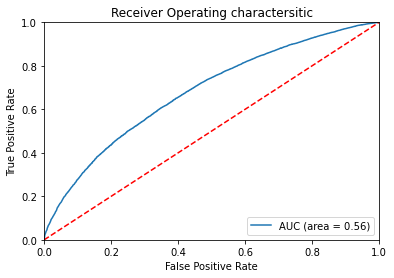

In [55]:
Log_roc_auc = roc_auc_score(y_test, y_pred_xgb_test)
fpr, tpr, thereholds = roc_curve(y_test, xgb_model.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label = 'AUC (area = %0.2f)' % Log_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating charactersitic')
plt.legend(loc = 'lower right')
plt.savefig('Log_Roc')
plt.show

Bu modellimizi artık raporlayabiliriz.

In [56]:
print(classification_report(y_test, y_pred_xgb_test))

              precision    recall  f1-score   support

           0       0.43      0.19      0.26      9619
           1       0.81      0.93      0.87     35452

    accuracy                           0.77     45071
   macro avg       0.62      0.56      0.56     45071
weighted avg       0.73      0.77      0.74     45071



# Model Tunning

In [57]:
xgb_model.get_params().keys()

dict_keys(['objective', 'use_label_encoder', 'base_score', 'booster', 'callbacks', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'early_stopping_rounds', 'enable_categorical', 'eval_metric', 'feature_types', 'gamma', 'gpu_id', 'grow_policy', 'importance_type', 'interaction_constraints', 'learning_rate', 'max_bin', 'max_cat_threshold', 'max_cat_to_onehot', 'max_delta_step', 'max_depth', 'max_leaves', 'min_child_weight', 'missing', 'monotone_constraints', 'n_estimators', 'n_jobs', 'num_parallel_tree', 'predictor', 'random_state', 'reg_alpha', 'reg_lambda', 'sampling_method', 'scale_pos_weight', 'subsample', 'tree_method', 'validate_parameters', 'verbosity'])

Hiperparametrelerimizi belirleyip tune edilmiş bir model kuralım.

In [58]:
grid_params = {'max_depth' : [5, 7, 9],
               'learning_rate' : [0.1, 0.01, 0.001],
               'subsample' : [0.5, 0.7, 0.9]}

xgb_gs = xgb.XGBClassifier()

grid_search = GridSearchCV(xgb_gs, grid_params, cv=10, scoring='accuracy',
                           n_jobs=-1, verbose=2).fit(x_train, y_train)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


In [59]:
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'subsample': 0.9}

In [60]:
gs_cv_tuned = XGBClassifier(learning_rate = 0.1, max_depth = 5,
                            subsample = 0.9).fit(x_train, y_train)

In [61]:
y_pred_tuned_train = gs_cv_tuned.predict(x_train)
y_pred_tuned_train_proba = gs_cv_tuned.predict_proba(x_train)
print(y_pred_tuned_train_proba[:10])

[[0.16095418 0.8390458 ]
 [0.19937879 0.8006212 ]
 [0.49778384 0.50221616]
 [0.25243807 0.74756193]
 [0.04380804 0.95619196]
 [0.5347406  0.46525937]
 [0.06192112 0.9380789 ]
 [0.34760946 0.65239054]
 [0.23471701 0.765283  ]
 [0.04399252 0.9560075 ]]


In [62]:
y_pred_tuned_test = gs_cv_tuned.predict(x_test)
y_pred_tuned_test_proba = gs_cv_tuned.predict_proba(x_test)
print(y_pred_tuned_test_proba[:10])

[[0.647817   0.35218295]
 [0.26784515 0.73215485]
 [0.3297301  0.6702699 ]
 [0.14845377 0.8515462 ]
 [0.29886955 0.70113045]
 [0.06439483 0.93560517]
 [0.2810071  0.7189929 ]
 [0.06961405 0.93038595]
 [0.45436603 0.545634  ]
 [0.24486446 0.75513554]]


Modelimizin açıklama oranına bakalım.

In [87]:
print(accuracy_score(y_train, y_pred_tuned_train))
xgb_acc = accuracy_score(y_test, y_pred_tuned_test)
print(xgb_acc)

0.8020044882279107
0.7924164096647511


Confusion Matrix'e bakalım.

In [64]:
print(confusion_matrix(y_train, y_pred_tuned_train))

[[ 2502 19589]
 [ 1233 81840]]


In [65]:
print(confusion_matrix(y_test, y_pred_tuned_test))

[[  886  8733]
 [  623 34829]]


ROC eğrisini çizdirelim.

<function matplotlib.pyplot.show(close=None, block=None)>

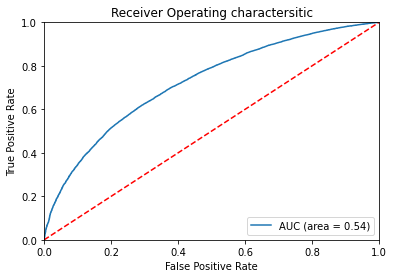

In [66]:
Log_roc_auc = roc_auc_score(y_test, y_pred_tuned_test)
fpr, tpr, thereholds = roc_curve(y_test, gs_cv_tuned.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label = 'AUC (area = %0.2f)' % Log_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating charactersitic')
plt.legend(loc = 'lower right')
plt.savefig('Log_Roc')
plt.show

Bu modellimizi de artık raporlayabiliriz.

In [67]:
print(classification_report(y_test, y_pred_tuned_test))

              precision    recall  f1-score   support

           0       0.59      0.09      0.16      9619
           1       0.80      0.98      0.88     35452

    accuracy                           0.79     45071
   macro avg       0.69      0.54      0.52     45071
weighted avg       0.75      0.79      0.73     45071



# Decision Tree Classifier

Direkt olarak hiperparametreleri belirleyelim ve modelimizi tune ederek oluşturalım.

In [72]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

params = {'criterion' : ['gini', 'entropy'],
          'max_depth' : range(2, 30, 2),
          'min_samples_leaf' : range(3, 30, 5),
          'min_samples_split' : range(3, 15, 5),
          'splitter' : ['best', 'random']}

gs_dt = GridSearchCV(dtc, params, cv=10, n_jobs=-1,
                     verbose=2).fit(x_train, y_train)

Fitting 10 folds for each of 1008 candidates, totalling 10080 fits


In [73]:
gs_dt.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_leaf': 28,
 'min_samples_split': 3,
 'splitter': 'random'}

In [77]:
gs_cv_tuned_2 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 6,
                                      min_samples_leaf = 28, min_samples_split = 3,
                                      splitter = 'random').fit(x_train, y_train)

In [78]:
y_pred_tuned_2_train = gs_cv_tuned_2.predict(x_train)
y_pred_tuned_2_train_proba = gs_cv_tuned_2.predict_proba(x_train)
print(y_pred_tuned_2_train_proba[:10])

[[0.11392057 0.88607943]
 [0.20192497 0.79807503]
 [0.40362538 0.59637462]
 [0.27971332 0.72028668]
 [0.14831922 0.85168078]
 [0.31240658 0.68759342]
 [0.11392057 0.88607943]
 [0.3552492  0.6447508 ]
 [0.16537377 0.83462623]
 [0.04472843 0.95527157]]


In [79]:
y_pred_tuned_2_test = gs_cv_tuned_2.predict(x_test)
y_pred_tuned_2_test_proba = gs_cv_tuned_2.predict_proba(x_test)
print(y_pred_tuned_2_test_proba[:10])

[[0.54205607 0.45794393]
 [0.416      0.584     ]
 [0.40362538 0.59637462]
 [0.16537377 0.83462623]
 [0.22811833 0.77188167]
 [0.0952381  0.9047619 ]
 [0.22811833 0.77188167]
 [0.04472843 0.95527157]
 [0.38826291 0.61173709]
 [0.27971332 0.72028668]]


Modelimizin açıklama oranına bakalım.

In [88]:
print(accuracy_score(y_train, y_pred_tuned_2_train))
dt_acc = accuracy_score(y_test, y_pred_tuned_2_test)
print(dt_acc)

0.7914875813015861
0.7882230258924807


Confusion Matrix'e bakalım.

In [83]:
print(confusion_matrix(y_train, y_pred_tuned_2_train))

[[  859 21232]
 [  696 82377]]


In [84]:
print(confusion_matrix(y_test, y_pred_tuned_2_test))

[[  362  9257]
 [  288 35164]]


ROC eğrisini çizdirelim.

<function matplotlib.pyplot.show(close=None, block=None)>

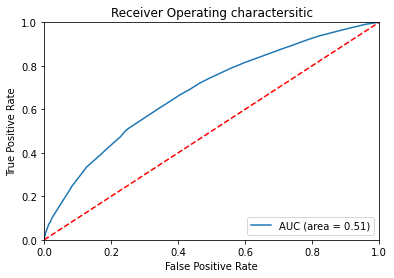

In [85]:
Log_roc_auc = roc_auc_score(y_test, y_pred_tuned_2_test)
fpr, tpr, thereholds = roc_curve(y_test, gs_cv_tuned_2.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label = 'AUC (area = %0.2f)' % Log_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating charactersitic')
plt.legend(loc = 'lower right')
plt.savefig('Log_Roc')
plt.show

Son olarak modelimizi raporlayalım.

In [86]:
print(classification_report(y_test, y_pred_tuned_2_test))

              precision    recall  f1-score   support

           0       0.56      0.04      0.07      9619
           1       0.79      0.99      0.88     35452

    accuracy                           0.79     45071
   macro avg       0.67      0.51      0.48     45071
weighted avg       0.74      0.79      0.71     45071



# Model Seçimi

Tune edilmiş modellerden hangisinin tahmin performansının daha iyi olduğuna bakalım.

In [89]:
models = pd.DataFrame({'Classification Models' : ['XGBoost', 'Decision Tree Classifier'],
                       'Scores' : [xgb_acc, dt_acc]})
models.sort_values(by = 'Scores', ascending = False)

,Classification Models,Scores
0,XGBoost,0.792416
1,Decision Tree Classifier,0.788223


Bu projede uygun görüp kullandığım sınıflandırma metodları XGBoost ve Decision Tree Classifier idi. Ancak kredi risk analizlerinde makine öğrenimi olarak Artifical Neural Network (Yapay Sinir Ağları) da kullanılabilirdi.